In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import json

# Load the dataset
with open("/content/drive/My Drive/CS449_Project/CS_449_Data/full_dataset_4.csv", 'r') as csv:
  full_dataset = pd.read_csv(csv)

full_dataset

,Unnamed: 0.1,Unnamed: 0,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,...,Open,High,Low,Close,Adj Close,Volume,symbol,return,future return,return group
0,0,0,1045,09/30/2005,2005,3.0,INDL,C,D,STD,...,20.260000,21.049999,20.180000,21.010000,19.807001,NaN,AAL,NaN,90.385527,4.0
1,1,1,1045,03/31/2006,2006,1.0,INDL,C,D,STD,...,37.700001,40.020000,37.599998,40.000000,37.709663,-31.306631,AAL,90.385527,26.349981,4.0
2,2,2,1045,06/30/2006,2006,2.0,INDL,C,D,STD,...,48.400002,50.900002,47.630001,50.540001,47.646152,32.701002,AAL,26.349981,-70.894338,-4.0
3,3,3,1045,12/31/2007,2007,4.0,INDL,C,D,STD,...,14.850000,15.000000,14.550000,14.710000,13.867728,-5.591655,AAL,-70.894338,-39.428968,-4.0
4,4,4,1045,03/31/2008,2008,1.0,INDL,C,D,STD,...,8.480000,9.030000,8.330000,8.910000,8.399826,18.326575,AAL,-39.428968,-71.941634,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38407,38407,38407,316056,12/31/2021,2021,4.0,INDL,C,D,STD,...,131.029999,133.039993,131.029999,132.440002,130.298828,-69.398669,ALLE,0.471516,-16.804949,-3.0
38408,38408,38408,316056,03/31/2022,2022,1.0,INDL,C,D,STD,...,112.949997,113.150002,109.760002,109.779999,108.402176,190.335235,ALLE,-16.804949,-10.459127,-3.0
38409,38409,38409,316056,06/30/2022,2022,2.0,INDL,C,D,STD,...,97.529999,98.800003,96.900002,97.900002,97.064255,3.869304,ALLE,-10.459127,-7.999894,-2.0
38410,38410,38410,316056,09/30/2022,2022,3.0,INDL,C,D,STD,...,89.400002,91.500000,88.290001,89.680000,89.299217,-0.969726,ALLE,-7.999894,NaN,NaN


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


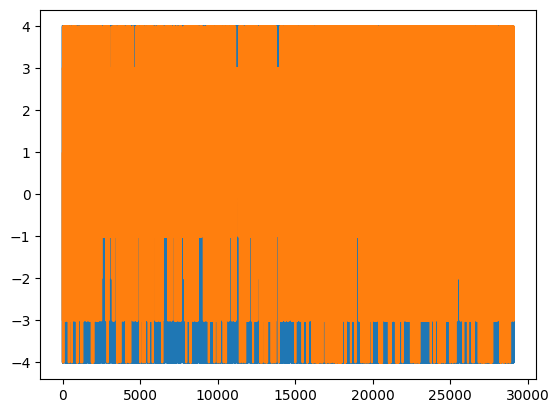

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Identify the data we want to use in the model
logreg_data = full_dataset[['return', 'Volume', 'op_income_pre_dep', 'op_income_post_dep', 'current_assets', 'current_liabilities', 'retained_earnings', 'working_capital', 'return group']].dropna().reset_index(drop=True)

# Split inputs and outputs
X = logreg_data[['return', 'Volume', 'op_income_pre_dep', 'op_income_post_dep', 'current_assets', 'current_liabilities', 'retained_earnings', 'working_capital']].dropna()
y = logreg_data["return group"]

# Fit the logistic regression, use penalty and class weighting to attempt to push the model to predict more losses
logisticRegr = LogisticRegression(penalty = "l2", class_weight={-4:1.1, -3:1.1, -2:1.1, -1:0.9, 1:0.9, 2:1, 3:1, 4:1})
logisticRegr.fit(X, y)

x_pred = logisticRegr.predict(X)

plt.plot(y)
plt.plot(x_pred)

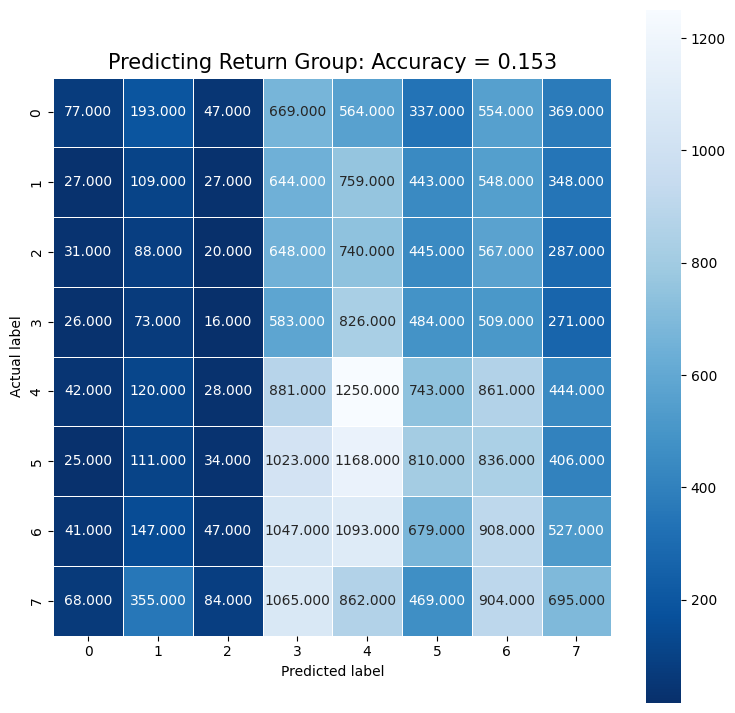

In [ ]:
# create a confusion matrix to understand where the model is predicting and missing more for return groups
score = logisticRegr.score(X, y)
cm = metrics.confusion_matrix(y, x_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label'); 
all_sample_title = 'Predicting Return Group: Accuracy = {0}'.format(np.round_(score, decimals = 3))
plt.title(all_sample_title, size = 15);

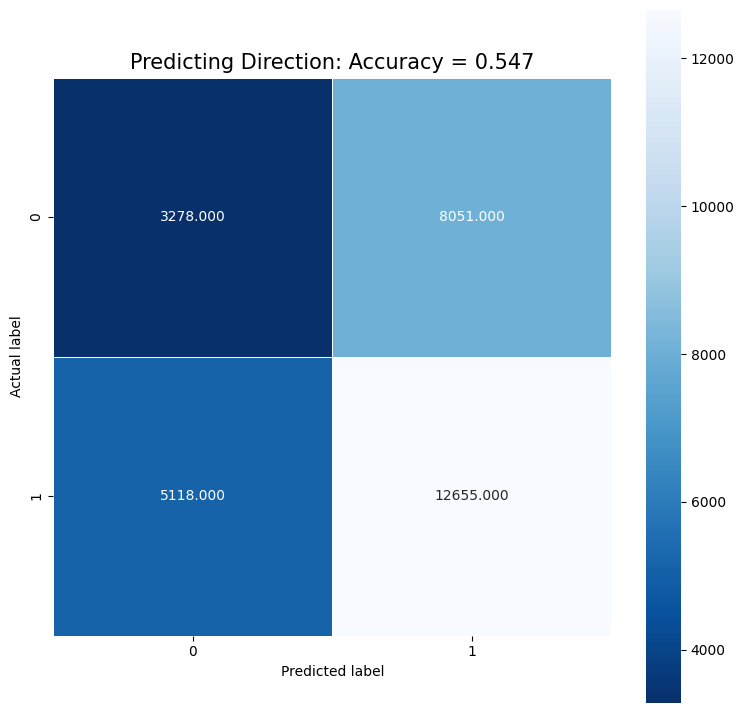

In [ ]:
# create a confusion matrix for predicting the general direction of a stock
# takes the predictions > 0, checks if they are equal to the correct values > 0, then divide by total number of items
score = sum((x_pred>0)==(y>0))/len(y)
cm = metrics.confusion_matrix(y>0, x_pred>0)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Predicting Direction: Accuracy = {0}'.format(np.round_(score, decimals = 3))
plt.title(all_sample_title, size = 15);